In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
data = pd.read_excel("../Paris housing Data Set 2 4050.xlsx")
#data.head()

In [4]:
#data.isna().sum()

In [5]:
filtered = data[pd.isna(data['bedrooms']) & pd.isna(data['bathrooms'])]
len(filtered)

7

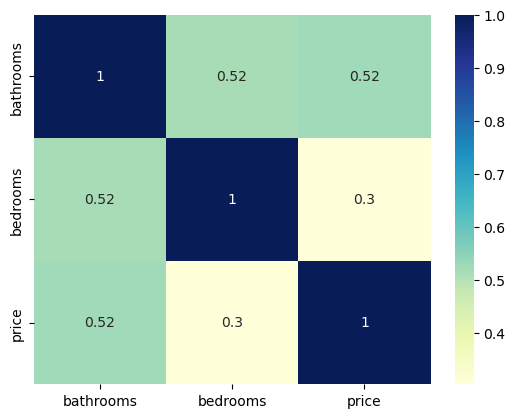

In [6]:
dataplot = sns.heatmap(data[['bathrooms','bedrooms','price']].corr(method="pearson"), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [7]:
data['bathrooms'].nunique()

28

In [8]:
# arrange data by price from biggest to smallest
data = data.sort_values(by='price', ascending=False)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
7252,7700000.0,6.0,8.00,12050.0,27600.0,2.5,4.0,13,1910.0,1987,3940.0
3914,7062500.0,5.0,4.50,10040.0,37325.0,2.0,3.0,11,1940.0,2001,3930.0
9254,6885000.0,6.0,7.75,9890.0,31374.0,2.0,3.0,13,2001.0,0,4540.0
4411,5570000.0,5.0,5.75,9200.0,35069.0,2.0,3.0,13,2001.0,0,3560.0
1448,5350000.0,5.0,5.00,8000.0,23985.0,2.0,3.0,12,2009.0,0,4600.0


In [9]:
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
7252,7700000.0,6.0,8.00,12050.0,27600.0,2.5,4.0,13,1910.0,1987,3940.0
3914,7062500.0,5.0,4.50,10040.0,37325.0,2.0,3.0,11,1940.0,2001,3930.0
9254,6885000.0,6.0,7.75,9890.0,31374.0,2.0,3.0,13,2001.0,0,4540.0
4411,5570000.0,5.0,5.75,9200.0,35069.0,2.0,3.0,13,2001.0,0,3560.0
1448,5350000.0,5.0,5.00,8000.0,23985.0,2.0,3.0,12,2009.0,0,4600.0
1315,5300000.0,6.0,6.00,7390.0,24829.0,2.0,4.0,12,1991.0,0,4320.0
1164,5110800.0,5.0,5.25,8010.0,45517.0,2.0,3.0,12,1999.0,0,3430.0
8092,4668000.0,5.0,6.75,9640.0,13068.0,1.0,3.0,12,1983.0,2009,3270.0
2626,4500000.0,5.0,5.50,6640.0,40014.0,2.0,3.0,12,2004.0,0,3030.0
8638,4489000.0,4.0,3.00,6430.0,27517.0,2.0,3.0,12,2001.0,0,3720.0


In [10]:
data.grade.value_counts()

grade
7     8656
8     5359
9     2233
6     2029
10     998
11     352
5      241
12      85
4       29
13      13
3        3
1        1
Name: count, dtype: int64

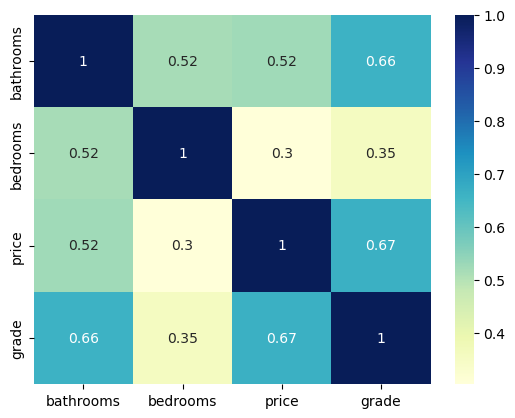

In [11]:
dataplot = sns.heatmap(data[['bathrooms','bedrooms','price','grade']].corr(method="pearson"), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [12]:
data.bathrooms.value_counts()

bathrooms
2.50    4693
1.00    3829
1.75    2999
2.25    1900
2.00    1867
1.50    1366
2.75    1062
3.00     672
3.50     566
3.25     480
3.75     130
4.00     115
4.50      86
4.25      70
0.75      69
4.75      20
5.00      19
5.25      11
5.50       8
1.25       6
5.75       4
0.50       4
6.00       4
8.00       2
6.25       2
6.75       2
7.75       1
7.50       1
Name: count, dtype: int64

In [13]:
data.bathrooms.nunique()

28

In [14]:
data.dtypes

price               float64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_total          float64
floors              float64
condition           float64
grade                 int64
built               float64
renovated             int64
living_area_sqft    float64
dtype: object

In [15]:
data['bathrooms'].dropna(inplace=True)
data['bedrooms'].dropna(inplace=True)

In [16]:
filtered.isna().sum()

price               0
bedrooms            7
bathrooms           7
sqft_living         0
sqft_total          0
floors              0
condition           0
grade               0
built               0
renovated           0
living_area_sqft    0
dtype: int64

In [17]:
data['built'].describe().T

count    19998.000000
mean      1967.953145
std         28.317403
min       1900.000000
25%       1950.000000
50%       1969.000000
75%       1991.000000
max       2015.000000
Name: built, dtype: float64

In [18]:
built_data = data[data['built'] > 1991]
built_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4864.0,610453.431538,424949.585530,154000.0,357421.50,500000.0,724962.50,6885000.0
bedrooms,4860.0,3.521811,0.821692,1.0,3.00,4.0,4.00,10.0
bathrooms,4864.0,2.653012,0.607367,0.5,2.50,2.5,2.75,8.0
sqft_living,4866.0,2503.668311,1019.062098,384.0,1760.00,2350.0,3040.00,13540.0
sqft_total,4864.0,17104.294202,53134.125198,572.0,4057.00,6243.0,9690.25,1024068.0
floors,4866.0,1.970201,0.420487,1.0,2.00,2.0,2.00,3.5
condition,4865.0,3.039260,0.211463,2.0,3.00,3.0,3.00,5.0
grade,4866.0,8.350185,1.176446,4.0,7.25,8.0,9.00,13.0
built,4866.0,2001.983970,5.741767,1992.0,1998.00,2003.0,2006.00,2015.0
renovated,4866.0,2.061241,64.276400,0.0,0.00,0.0,0.00,2009.0


In [19]:
built_data.bedrooms.value_counts()

bedrooms
4.0     2045
3.0     1955
2.0      411
5.0      391
6.0       34
1.0       14
7.0        7
10.0       1
8.0        1
9.0        1
Name: count, dtype: int64

In [20]:
data.bedrooms.value_counts()

bedrooms
3.0     9163
4.0     6307
2.0     2567
5.0     1436
6.0      260
1.0      189
7.0       38
8.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: count, dtype: int64

In [21]:
data.isna().sum()   

price                4
bedrooms            15
bathrooms           11
sqft_living          1
sqft_total           5
floors               0
condition            1
grade                0
built                1
renovated            0
living_area_sqft     6
dtype: int64

### To avoid errors resulting from NaN and non-matching dimensions, we shall replace the NaN in price with 0
### then drop all rows with NaN values in the data

In [22]:
data_without_price = data[data.price.isna()].reset_index(drop=True)
#data_without_price['price'] = 0
#data_without_price.drop(columns=['price','sqft_total'], inplace=True)
data_without_price

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,NaN,4.0,2.25,2240.0,9684.0,2.0,4.0,9,1970.0,0,2440.0
1,NaN,3.0,1.50,1140.0,20383.0,1.0,3.0,7,1985.0,0,1200.0
2,NaN,4.0,2.75,3330.0,9143.0,2.0,4.0,10,1995.0,0,2390.0
3,NaN,4.0,2.50,2880.0,9003.0,2.0,3.0,10,2008.0,0,2640.0


In [23]:
row_data = data_without_price.iloc[0].values.tolist()
row_data[1:]

[4.0, 2.25, 2240.0, 9684.0, 2.0, 4.0, 9.0, 1970.0, 0.0, 2440.0]

In [24]:
data_without_nan = data.dropna()
#data_without_nan.drop(columns=['sqft_total'], inplace=True)
print("ROWS DROPPED: ", len(data) - len(data_without_nan))
data_without_nan.isna().sum()   

ROWS DROPPED:  37


price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_total          0
floors              0
condition           0
grade               0
built               0
renovated           0
living_area_sqft    0
dtype: int64

In [25]:
data_without_nan.head()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
7252,7700000.0,6.0,8.00,12050.0,27600.0,2.5,4.0,13,1910.0,1987,3940.0
3914,7062500.0,5.0,4.50,10040.0,37325.0,2.0,3.0,11,1940.0,2001,3930.0
9254,6885000.0,6.0,7.75,9890.0,31374.0,2.0,3.0,13,2001.0,0,4540.0
4411,5570000.0,5.0,5.75,9200.0,35069.0,2.0,3.0,13,2001.0,0,3560.0
1448,5350000.0,5.0,5.00,8000.0,23985.0,2.0,3.0,12,2009.0,0,4600.0


In [26]:
print(len(row_data[1:]))
len(data_without_nan.columns.to_list())

10


11

In [27]:
# Target row
target_row = np.array([row_data[1:]])  # Convert to 2D array

# Compute cosine similarity
similarities = cosine_similarity(data_without_nan.iloc[:,1:].values, target_row)

# Add similarity scores to the DataFrame
data_without_nan['similarity'] = similarities

# Sort by highest similarity
df_sorted = data_without_nan.sort_values(by='similarity', ascending=False)
#df_sorted = df_sorted[df_sorted['similarity'] > 0.9999]
df_sorted

C:\Users\HP\AppData\Local\Temp\ipykernel_11112\1442875428.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_nan['similarity'] = similarities


,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft,similarity
10833,608700.0,4.0,2.50,2260.0,9696.0,1.0,3.0,9,1983.0,0,2400.0,0.999990
18862,740000.0,4.0,2.50,2300.0,9900.0,1.0,3.0,8,1961.0,0,2510.0,0.999986
13612,459000.0,4.0,1.75,2260.0,9703.0,1.0,2.0,8,1978.0,0,2390.0,0.999985
1686,470000.0,3.0,2.25,2220.0,9800.0,2.0,3.0,8,1987.0,0,2420.0,0.999981
10825,515700.0,3.0,2.50,2180.0,9722.0,2.0,3.0,8,1994.0,0,2440.0,0.999978
...,...,...,...,...,...,...,...,...,...,...,...,...
10892,440000.0,2.0,1.50,1120.0,1024.0,2.0,3.0,8,1970.0,1998,1120.0,0.540301
5826,250000.0,3.0,2.25,1050.0,572.0,2.0,3.0,7,2006.0,0,1260.0,0.539373
7375,250000.0,1.0,1.00,780.0,1033.0,1.0,3.0,7,1922.0,1985,1040.0,0.537968
3452,1234570.0,2.0,2.50,2470.0,609.0,3.0,3.0,11,2011.0,0,2440.0,0.504650


In [28]:
len(df_sorted)

19962

In [29]:
data.nunique()

price               3702
bedrooms              12
bathrooms             28
sqft_living          879
sqft_total          9171
floors                 6
condition              5
grade                 12
built                116
renovated             70
living_area_sqft     681
dtype: int64

In [30]:
data.sqft_total.describe().T.round(2)

count      19994.00
mean       15606.96
std        41775.76
min          520.00
25%         5350.00
50%         7817.50
75%        11000.00
max      1651359.00
Name: sqft_total, dtype: float64

In [31]:
len(data[data['sqft_total']>200000])

244

In [32]:
data_without_price['sqft_total'].describe().T   

count        4.000000
mean     12053.250000
std       5560.925005
min       9003.000000
25%       9108.000000
50%       9413.500000
75%      12358.750000
max      20383.000000
Name: sqft_total, dtype: float64

In [33]:
data_without_price

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,NaN,4.0,2.25,2240.0,9684.0,2.0,4.0,9,1970.0,0,2440.0
1,NaN,3.0,1.50,1140.0,20383.0,1.0,3.0,7,1985.0,0,1200.0
2,NaN,4.0,2.75,3330.0,9143.0,2.0,4.0,10,1995.0,0,2390.0
3,NaN,4.0,2.50,2880.0,9003.0,2.0,3.0,10,2008.0,0,2640.0


In [34]:
similar_data = data[(data['sqft_total'] >= 9000) & (data['sqft_total'] <= 9700)]
similar_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
3748,2450000.0,5.0,4.00,4430.0,9000.0,2.0,3.0,10,2013.0,0,2470.0
5617,2400000.0,5.0,3.25,3410.0,9088.0,2.0,3.0,9,1912.0,0,3540.0
312,2384000.0,5.0,2.50,3650.0,9050.0,2.0,5.0,10,1921.0,0,2880.0
19823,2320000.0,4.0,3.50,5050.0,9520.0,2.0,3.0,11,2007.0,0,2430.0
779,2250000.0,5.0,4.25,4860.0,9453.0,1.5,5.0,10,1905.0,0,3150.0


In [35]:
row_data

[nan, 4.0, 2.25, 2240.0, 9684.0, 2.0, 4.0, 9.0, 1970.0, 0.0, 2440.0]

In [36]:
# Target row
target_row = np.array([row_data[1:]])  # Convert to 2D array

# Compute cosine similarity
similarities = cosine_similarity(similar_data.iloc[:,1:].values, target_row)

# Add similarity scores to the DataFrame
similar_data['similarity'] = similarities

# Sort by highest similarity
df_sorted = similar_data.sort_values(by='similarity', ascending=False)
#df_sorted = df_sorted[df_sorted['similarity'] > 0.9999]
df_sorted

C:\Users\HP\AppData\Local\Temp\ipykernel_11112\887549505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_data['similarity'] = similarities


,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft,similarity
4385,NaN,4.0,2.25,2240.0,9684.0,2.0,4.0,9,1970.0,0,2440.0,1.000000
10833,608700.0,4.0,2.50,2260.0,9696.0,1.0,3.0,9,1983.0,0,2400.0,0.999990
19039,680000.0,3.0,1.75,2330.0,9652.0,1.0,4.0,8,1968.0,0,2420.0,0.999957
10924,305000.0,4.0,2.25,2210.0,9371.0,2.0,4.0,8,1968.0,0,2300.0,0.999954
5659,668500.0,4.0,2.25,2290.0,9546.0,1.0,4.0,8,1976.0,0,2360.0,0.999954
...,...,...,...,...,...,...,...,...,...,...,...,...
7700,2150000.0,3.0,2.75,3470.0,9610.0,3.0,3.0,11,1989.0,2000,4130.0,0.968513
4468,925000.0,4.0,3.75,4420.0,9492.0,2.0,3.0,9,1962.0,2005,2880.0,0.964185
9133,1400000.0,5.0,3.25,4300.0,9270.0,2.0,3.0,10,1957.0,2009,2780.0,0.963728
17600,1284000.0,5.0,4.25,5040.0,9466.0,2.0,3.0,11,2004.0,0,4300.0,0.960531


In [37]:
# drop the sqft_total column
#df_sorted.drop(columns=['sqft_total'], inplace=True)

Text(0.5, 1.0, 'Scatter Plot of Price vs. Living Area')

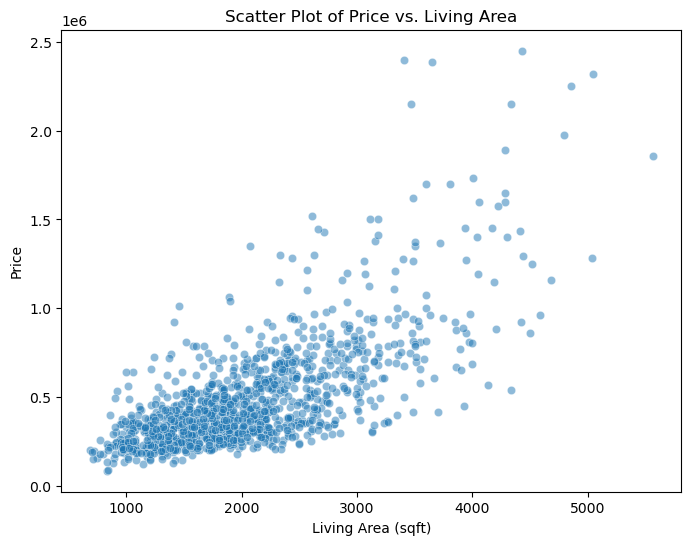

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_sorted["sqft_living"], y=df_sorted["price"], alpha=0.5)

# Labels and title
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Scatter Plot of Price vs. Living Area")
#plt.show()


In [39]:
from scipy.stats import zscore


In [40]:
#df["price_zscore"] = (df["price"] - df["price"].mean()) / df["price"].std()
data_without_nan["price_zscore"] = zscore(data_without_nan["price"])
data_without_nan["sqft_living_zscore"] = zscore(data_without_nan["sqft_living"])
data_without_nan

C:\Users\HP\AppData\Local\Temp\ipykernel_11112\3729096363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_nan["price_zscore"] = zscore(data_without_nan["price"])
C:\Users\HP\AppData\Local\Temp\ipykernel_11112\3729096363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_nan["sqft_living_zscore"] = zscore(data_without_nan["sqft_living"])


,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft,similarity,price_zscore,sqft_living_zscore
7252,7700000.0,6.0,8.00,12050.0,27600.0,2.5,4.0,13,1910.0,1987,3940.0,0.967860,19.574105,11.035547
3914,7062500.0,5.0,4.50,10040.0,37325.0,2.0,3.0,11,1940.0,2001,3930.0,0.978777,17.832386,8.815544
9254,6885000.0,6.0,7.75,9890.0,31374.0,2.0,3.0,13,2001.0,0,4540.0,0.983441,17.347437,8.649872
4411,5570000.0,5.0,5.75,9200.0,35069.0,2.0,3.0,13,2001.0,0,3560.0,0.980472,13.754715,7.887781
1448,5350000.0,5.0,5.00,8000.0,23985.0,2.0,3.0,12,2009.0,0,4600.0,0.987728,13.153652,6.562406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,82500.0,2.0,1.00,520.0,22334.0,1.0,2.0,5,1951.0,0,1572.0,0.960835,-1.237726,-1.699101
8274,82000.0,3.0,1.00,860.0,10426.0,1.0,3.0,6,1954.0,0,1140.0,0.981774,-1.239092,-1.323578
16198,81000.0,2.0,1.00,730.0,9975.0,1.0,1.0,5,1943.0,0,860.0,0.977373,-1.241824,-1.467160
465,80000.0,1.0,0.75,430.0,5050.0,1.0,2.0,4,1912.0,0,1200.0,0.978115,-1.244556,-1.798504


In [41]:
data_without_nan.dtypes

price                 float64
bedrooms              float64
bathrooms             float64
sqft_living           float64
sqft_total            float64
floors                float64
condition             float64
grade                   int64
built                 float64
renovated               int64
living_area_sqft      float64
similarity            float64
price_zscore          float64
sqft_living_zscore    float64
dtype: object

In [42]:
# USE Z SCORES
#df_sorted[["price", "sqft_living"]] = df_sorted[["price", "sqft_living"]].apply(zscore)


Text(0.5, 1.0, 'Scatter Plot of Price vs. Living Area')

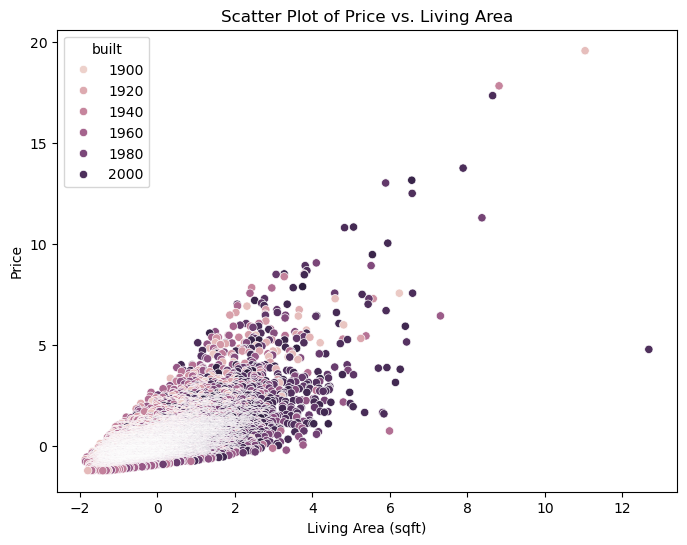

In [43]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data = data_without_nan, x=data_without_nan["sqft_living_zscore"], y=data_without_nan["price_zscore"], hue="built")
#sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

# Labels and title
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Scatter Plot of Price vs. Living Area")
#plt.show()

In [44]:
data.built.describe().T

count    19998.000000
mean      1967.953145
std         28.317403
min       1900.000000
25%       1950.000000
50%       1969.000000
75%       1991.000000
max       2015.000000
Name: built, dtype: float64

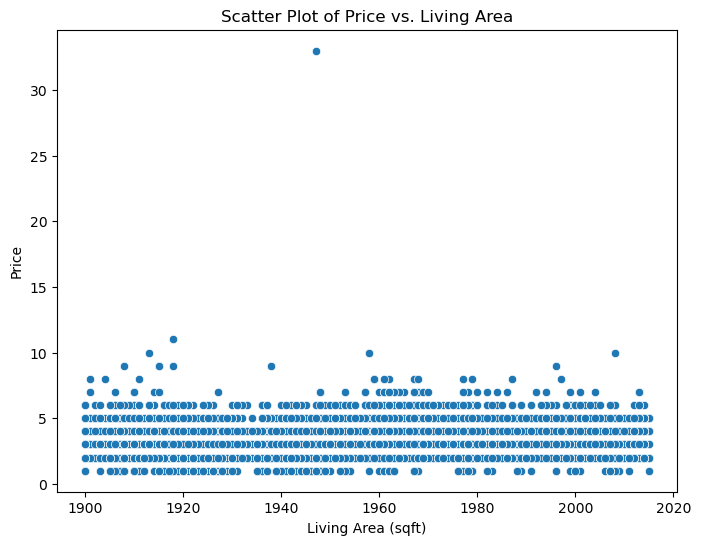

In [45]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data = data_without_nan, x=data_without_nan["built"], y=data_without_nan["bedrooms"])
#sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

# Labels and title
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Scatter Plot of Price vs. Living Area")
plt.show()

In [46]:
data.bedrooms.unique

<bound method Series.unique of 7252     6.0
3914     5.0
9254     6.0
4411     5.0
1448     5.0
        ... 
1149     1.0
4385     4.0
9963     3.0
17629    4.0
19908    4.0
Name: bedrooms, Length: 19999, dtype: float64>

In [47]:
print(len(data[data['bedrooms'] >=7]))
(len(data[data['bedrooms'] >=7])/len(data))*100

62


0.31001550077503875